  player_id  avg_balls_faced  avg_fantasy_score_batting
0  00015688        13.600000                   0.800000
1  00029c30         1.571429                   0.714286
2  0019ca13         2.000000                   1.000000
3  0030a57d         3.285714                   4.952381
4  00321fff         1.967742                   1.032258


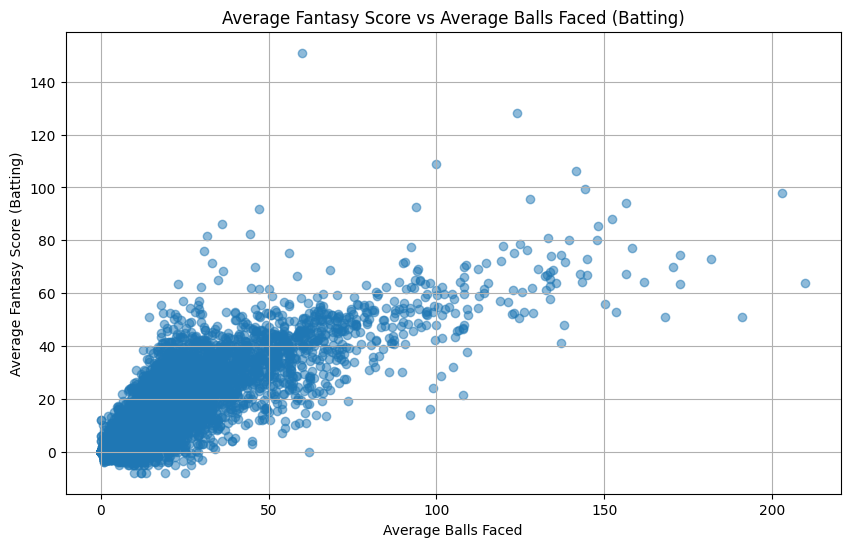

  player_id  avg_balls_bowled  avg_fantasy_score_bowling
0  00015688          0.000000                   1.600000
1  00029c30         11.142857                  15.142857
2  0019ca13          6.000000                   0.000000
3  0030a57d          0.000000                   4.000000
4  00321fff         20.774194                  31.193548


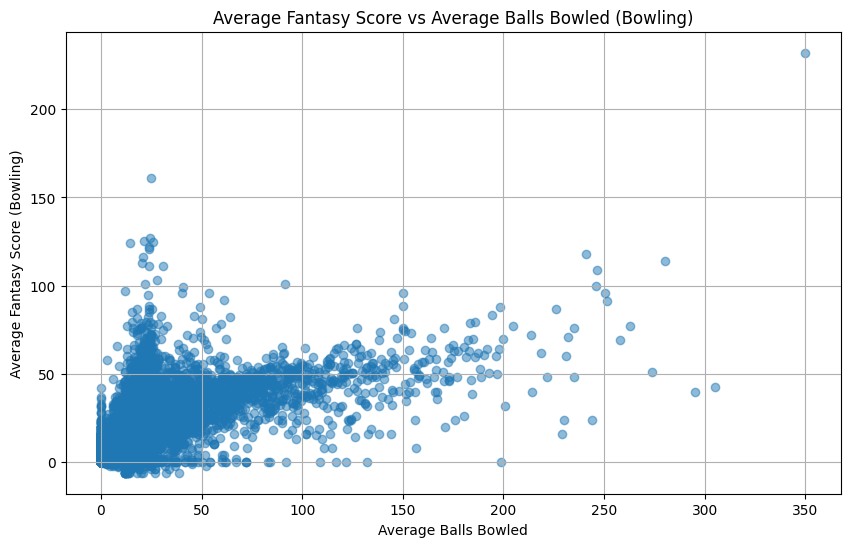

  player_id  avg_balls_faced  avg_fantasy_score_batting  avg_balls_bowled  \
0  00015688        13.600000                   0.800000          0.000000   
1  00029c30         1.571429                   0.714286         11.142857   
2  0019ca13         2.000000                   1.000000          6.000000   
3  0030a57d         3.285714                   4.952381          0.000000   
4  00321fff         1.967742                   1.032258         20.774194   

   avg_fantasy_score_bowling  
0                   1.600000  
1                  15.142857  
2                   0.000000  
3                   4.000000  
4                  31.193548  


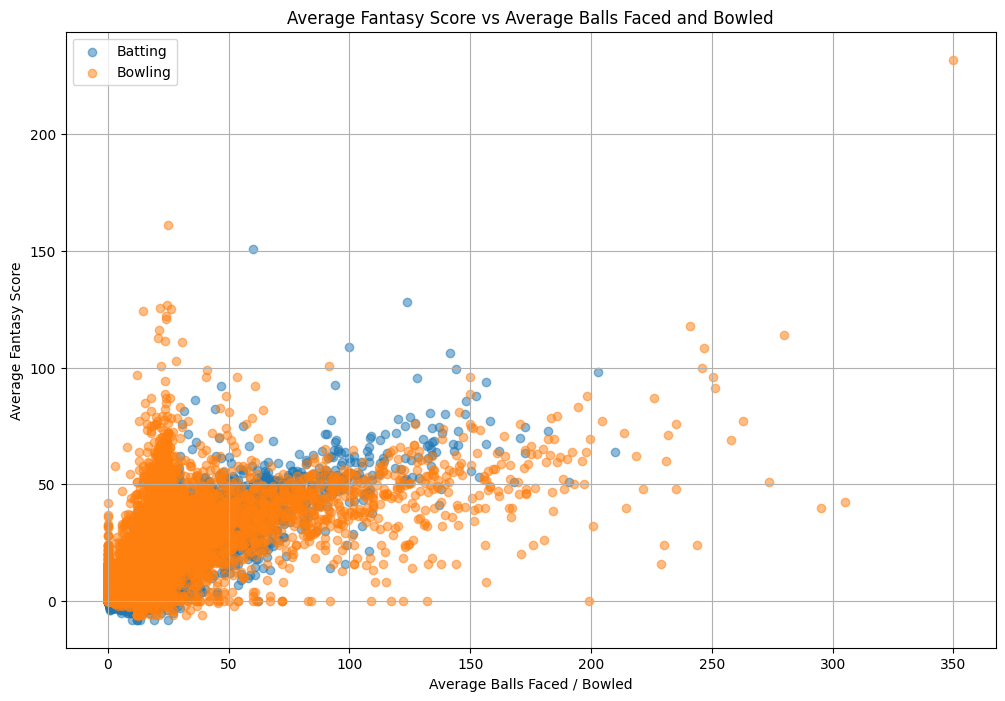

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)

#created a new dataframe with player_id and their average stats
player_stats=df.groupby('player_id').agg({
    'runs_scored': 'mean',
    'balls_faced': 'mean',
    'fours_scored': 'mean',
    'sixes_scored': 'mean',
    'balls_bowled': 'mean',
    'runs_conceded': 'mean',
    'wickets_taken': 'mean',
    'fantasy_score_batting': 'mean',
    'fantasy_score_bowling': 'mean',
    'fantasy_score_total': 'mean',
}).reset_index()

#creating a dataframe with avg_balls_faced and avg_fansasy_score_batting
avg_stats_batting_df = df.groupby('player_id')[['balls_faced', 'fantasy_score_batting']].mean().reset_index()
# Renaming columns for clarity
avg_stats_batting_df.columns = ['player_id', 'avg_balls_faced', 'avg_fantasy_score_batting']
print(avg_stats_batting_df.head())

# Plotting the average fantasy score vs average balls faced batting
plt.figure(figsize=(10, 6))
plt.scatter(avg_stats_df['avg_balls_faced'], avg_stats_df['avg_fantasy_score_batting'], alpha=0.5)
plt.title('Average Fantasy Score vs Average Balls Faced (Batting)')
plt.xlabel('Average Balls Faced')
plt.ylabel('Average Fantasy Score (Batting)')
plt.grid(True)
plt.show()

#creating a dataframe with avg_balls_bowled and avg_fansasy_score_bowling
avg_stats_bowling_df = df.groupby('player_id')[['balls_bowled', 'fantasy_score_bowling']].mean().reset_index()
# Renaming columns for clarity
avg_stats_bowling_df.columns = ['player_id', 'avg_balls_bowled', 'avg_fantasy_score_bowling']
print(avg_stats_bowling_df.head())
# Plotting the average fantasy score vs average balls bowled
plt.figure(figsize=(10, 6))
plt.scatter(avg_stats_bowling_df['avg_balls_bowled'], avg_stats_bowling_df['avg_fantasy_score_bowling'], alpha=0.5)
plt.title('Average Fantasy Score vs Average Balls Bowled (Bowling)')
plt.xlabel('Average Balls Bowled')
plt.ylabel('Average Fantasy Score (Bowling)')
plt.grid(True)
plt.show()
# Merging the batting and bowling average stats dataframes
avg_stats_df = pd.merge(avg_stats_batting_df, avg_stats_bowling_df, on='player_id', how='outer')
# Renaming columns for clarity
avg_stats_df.columns = ['player_id', 'avg_balls_faced', 'avg_fantasy_score_batting', 'avg_balls_bowled', 'avg_fantasy_score_bowling']
# Displaying the merged dataframe
print(avg_stats_df.head())
# Plotting the average fantasy score vs average balls faced and bowled
plt.figure(figsize=(12, 8))
plt.scatter(avg_stats_df['avg_balls_faced'], avg_stats_df['avg_fantasy_score_batting'], label='Batting', alpha=0.5)
plt.scatter(avg_stats_df['avg_balls_bowled'], avg_stats_df['avg_fantasy_score_bowling'], label='Bowling', alpha=0.5)
plt.title('Average Fantasy Score vs Average Balls Faced and Bowled')
plt.xlabel('Average Balls Faced / Bowled')
plt.ylabel('Average Fantasy Score')
plt.legend()
plt.grid(True)
plt.show()
# Saving the average stats dataframe to a CSV file
avg_stats_df.to_csv("C:\\Users\\Anshu\\Downloads\\average_player_stats.csv", index=False)



Now working on polynomial regressions

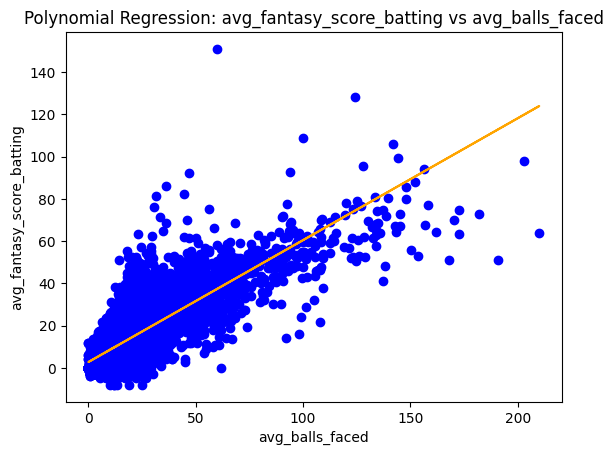

Trained W (weights): [ 1.10343523e+01  1.05904089e+01 -1.36861242e-03]
First few predictions: [10.607483    3.66641151  3.91372169  4.65565065  3.89510696]
R² Score: 0.695
MSE: 56.314
RMSE: 7.504


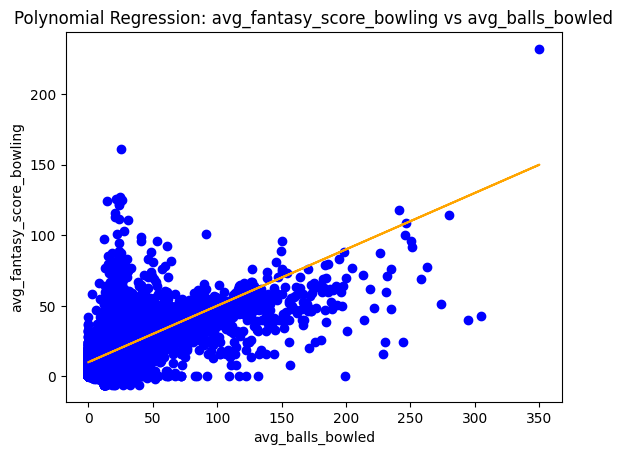

Trained W (weights): [16.94809462 10.91580628]
First few predictions: [ 9.9935613  14.44646349 12.39127787  9.9935613  18.29533263]
R² Score: 0.405
MSE: 174.786
RMSE: 13.221


In [ ]:
# Univariate Polynomial Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
desired_columns=['player_id','match_id','runs_scored','player_out','balls_faced','fours_scored','sixes_scored','catches_taken','run_out_direct','run_out_throw','stumpings_done','out_kind','dot_balls_as_batsman','order_seen','balls_bowled','runs_conceded','wickets_taken','bowled_done','lbw_done','maidens','dot_balls_as_bowler','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
df=pd.read_csv("C:\\Users\\Anshu\\Downloads\\mw_pw_profiles.csv",usecols=desired_columns)

class PolynomialRegression() :
    
    def __init__( self, degree, learning_rate, iterations ) :
        
        self.degree = degree
        
        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
    # function to transform X
    
    def transform( self, X ) :
        
        # initialize X_transform
        
        X_transform = np.ones( ( self.m, 1 ) )
        
        j = 0
    
        for j in range( self.degree + 1 ) :
            
            if j != 0 :
                
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )

        return X_transform   
    
    # function to normalize X_transform
    
    def normalize( self, X ) :
        
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        
        return X
        
    # model training
    
    def fit( self, X, Y ) :
        
        self.X = X
    
        self.Y = Y
    
        self.m, self.n = self.X.shape
    
        # weight initialization
    
        self.W = np.zeros( self.degree + 1 )
        
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
        X_transform = self.transform( self.X )
        
        # normalize X_transform
        
        X_normalize = self.normalize( X_transform )
                
        # gradient descent learning
    
        for i in range( self.iterations ) :
            
            h = self.predict( self.X )
        
            error = h - self.Y
            
            # update weights 
        
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error ) 
        
        return self
    
    # predict 
    
    def predict( self, X ) :
     
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
        X_transform = self.transform( X )
        
        X_normalize = self.normalize( X_transform )
        
        return np.dot( X_transform, self.W )


def main_batting():

    df = avg_stats_batting_df  # Use the average stats DataFrame created earlier

    X = df['avg_balls_faced'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_batting'].values

    model = PolynomialRegression(degree=2, learning_rate=0.01, iterations=500)
    model.fit(X, Y)

    Y_pred = model.predict(X)

    plt.scatter(X, Y, color='blue')
    plt.plot(X, Y_pred, color='orange')
    plt.title('Polynomial Regression: avg_fantasy_score_batting vs avg_balls_faced')
    plt.xlabel('avg_balls_faced')
    plt.ylabel('avg_fantasy_score_batting')
    plt.show()
    # Print trained weights
    print("Trained W (weights):", model.W)
    # Print the first few predictions
    print("First few predictions:", Y_pred[:5])
    from sklearn.metrics import r2_score, mean_squared_error

    # Evaluate
    r2 = r2_score(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    rmse = np.sqrt(mse)

    print("R² Score:", round(r2, 3))
    print("MSE:", round(mse, 3))
    print("RMSE:", round(rmse, 3))

    
if __name__ == "__main__":
    main_batting()

def main_bowling():
    df = avg_stats_bowling_df  # Use the average stats DataFrame created earlier

    X = df['avg_balls_bowled'].values.reshape(-1, 1)
    Y = df['avg_fantasy_score_bowling'].values

    model = PolynomialRegression(degree=1, learning_rate=.01, iterations=1000)
    model.fit(X, Y)

    Y_pred = model.predict(X)

    plt.scatter(X, Y, color='blue')
    plt.plot(X, Y_pred, color='orange')
    plt.title('Polynomial Regression: avg_fantasy_score_bowling vs avg_balls_bowled')
    plt.xlabel('avg_balls_bowled')
    plt.ylabel('avg_fantasy_score_bowling')
    plt.show()
    
    # Print trained weights
    print("Trained W (weights):", model.W)
    # Print the first few predictions
    print("First few predictions:", Y_pred[:5])
    
    from sklearn.metrics import r2_score, mean_squared_error

    # Evaluate
    r2 = r2_score(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    rmse = np.sqrt(mse)

    print("R² Score:", round(r2, 3))
    print("MSE:", round(mse, 3))
    print("RMSE:", round(rmse, 3))

if __name__ == "__main__":
    main_bowling()


